# Detection of Brest Cancer using a Random Forest Model

The ML group at UC Irvine maintains a dataset containing 286 instances of tumor observations. For each observation we record some variables such as the age of the patient, if the patient has reached menopause, the size of the tumor, etc. The dataset and information about it can be downloaded from 
>http://archive.ics.uci.edu/dataset/14/breast+cancer

We look at the existing data on how accurately models have been known to perform.


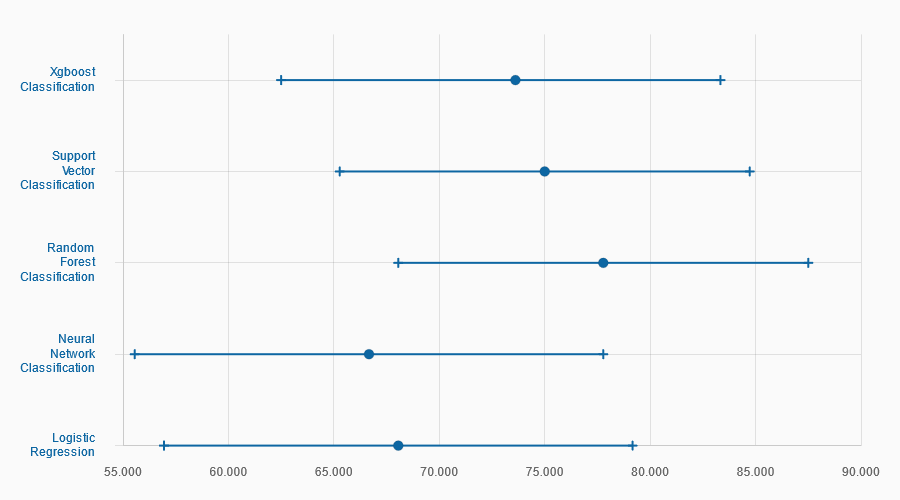

If you are pulling this file from the shared links, you will probably have the data bundled with this notebook.  Therefore, we jump straight into the data cleaning step.

## Cleaning the Data
We will be using Pandas for this project. If you don't have Pandas installed or you are not sure, you can run the cell below to install it/upgrade to the latest version.

In [2]:
! pip install pandas


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Now we shall load the file as a dataframe. A dataframe can be thought to be a table which is easy to work on.

In [3]:
import pandas as pd

df=pd.read_csv("breast-cancer.data",header=None)

Just to confirm that the data has been properly loaded and to see how it looks like, we take a look at ```df```. It is mentioned in the data description that columns 5 and 8 contain missing values, so we will look into them. 

In [4]:
df

,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
df[5].unique()

array(['no', 'yes', '?'], dtype=object)

In [6]:
df[8].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

We would need to clean this up. The data that you get shall often contain observations with incomplete records. We drop them. We also make the following changes:
1. No-recurrence-events will be represented by 0 and recurrence-events as 1.
2. We replace all class interval data with the lower bound of the class.
3. Replace binary choices with o or 1
4. Lastly, we will convert categorical variables to a from that is easy for the machine to work with. Fortunately for us, ```pandas``` has the functionality to do so built in.

In [7]:
df = df[~df.apply(lambda row: '?' in row.values, axis=1)]
df[0]=df[0].apply(lambda x: 1 if (x=="recurrence-events") else 0)
df[1]=df[1].apply(lambda x: int(x[0]))
df[3]=df[3].apply(lambda x: int(x.split("-")[0]))
df[4]=df[4].apply(lambda x: int(x.split("-")[0]))
df[5]=df[5].apply(lambda x: 0 if x=="no" else 1)
df[6]=df[6].apply(lambda x: int(x))
df[7]=df[6].apply(lambda x: 0 if x=="left" else 1)
df[9]=df[9].apply(lambda x: 0 if x=="no" else 1)
df=pd.get_dummies(df,columns=[2,8])
df.replace({True: 1, False: 0}, inplace=True)
df = df.astype(int)
df.columns = df.columns.astype(str)

C:\Users\ghosh\AppData\Local\Temp\ipykernel_11140\3682062164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[0]=df[0].apply(lambda x: 1 if (x=="recurrence-events") else 0)
C:\Users\ghosh\AppData\Local\Temp\ipykernel_11140\3682062164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[1]=df[1].apply(lambda x: int(x[0]))
C:\Users\ghosh\AppData\Local\Temp\ipykernel_11140\3682062164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [8]:
df

,0,1,3,4,5,6,7,9,2_ge40,2_lt40,2_premeno,8_central,8_left_low,8_left_up,8_right_low,8_right_up
0,0,3,30,0,0,3,1,0,0,0,1,0,1,0,0,0
1,0,4,20,0,0,2,1,0,0,0,1,0,0,0,0,1
2,0,4,20,0,0,2,1,0,0,0,1,0,1,0,0,0
3,0,6,15,0,0,2,1,0,1,0,0,0,0,1,0,0
4,0,4,0,0,0,2,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,3,30,0,0,2,1,0,0,0,1,0,0,1,0,0
282,1,3,20,0,0,3,1,1,0,0,1,0,0,1,0,0
283,1,6,20,0,0,1,1,0,1,0,0,0,0,1,0,0
284,1,4,30,3,0,3,1,0,1,0,0,0,1,0,0,0


## Implementing the model
To start, we first import some packages that has those models and other useful utilities built in. If you have those packages installed, you can skip the next step. 

In [9]:
! pip install scikit-learn 
! pip install matplotlib 
! pip install pyplot 
! pip install seaborn 


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Often we set aside some part of the data that the model doesn't see during training to check how well our model works. This is known as a train-test split. Often we also have another partition call a validation split for hyperparameter testing. This step often takes a lot of time, and I have already done it for this set of data so we will skip doing this from scratch.

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,[0]], test_size=0.3, random_state=100)

We now fit the model for this data. Random forests can be "tuned" to give better results but for now we will just use the inbuilt parameters. After we are done fitting we will use the ```X_test``` dataset to get predictions.

In [134]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Now we will look at some metrics to see how our model performs.

In [135]:
clf.score(X_test,y_test)

0.7261904761904762

In [136]:
confusion_matrix(y_test,y_pred)

array([[51,  8],
       [15, 10]], dtype=int64)

Here I have done the above, but I tuned the hyperparameters a bit. 

In [157]:
clf = RandomForestClassifier(max_depth=4, random_state=310, min_samples_split=8, min_samples_leaf=9,n_jobs=-1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8214285714285714

In [160]:
i=0
scores=[]
while i<500:
    X, X_test, y, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,[0]], test_size=0.3, random_state=i)
    clf.fit(X,y)
    scores.append(clf.score(X_test,y_test))
    i=i+1

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

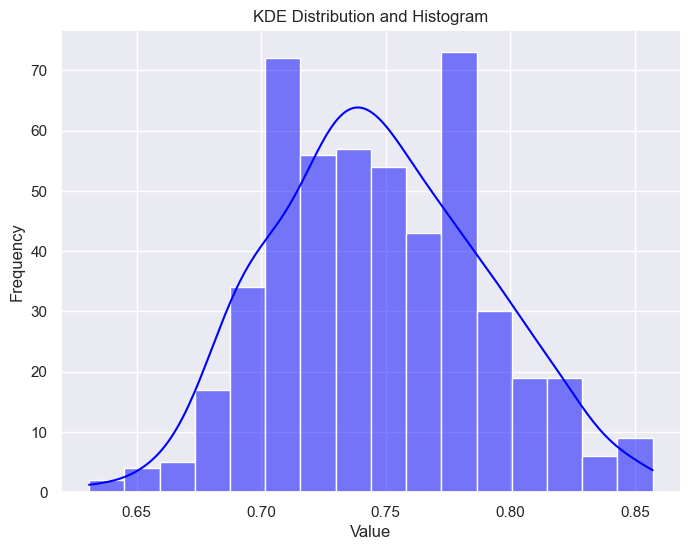

In [162]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot KDE distribution and histogram on the same plot
sns.histplot(scores, kde=True, color='blue', ax=ax)

ax.set_title("KDE Distribution and Histogram")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

plt.show()